# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [3]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [4]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    ## write code here for the Distance function here # 
    Number_of_Clusters = len(Cluster_Centroids)
    Number_of_points = len(Data_points)
    Cluster_Distance = np.zeros((Number_of_points, Number_of_Clusters))
    if Distance_Type == 'euclidean':
        Cluster_Distance = np.linalg.norm(Data_points[:, np.newaxis, :] - Cluster_Centroids, axis=2)
    elif Distance_Type == 'pearson':
        correlation_coefficients = np.zeros((Data_points.shape[0], Cluster_Centroids.shape[0]))
        for i, data_point in enumerate(Data_points):
            for j, centroid in enumerate(Cluster_Centroids):
                Cluster_Distance[i, j], _ = pearsonr(data_point, centroid)
        Cluster_Distance = 1 - Cluster_Distance
    else:
        raise ValueError("Distance_Type not supported. Please choose from 'euclidean'or 'Pearson'") 
    return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [5]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
    # write code for intial cluster heads here 
    indices = np.random.choice(Data_points.shape[0], Number_of_Clusters, replace=False)
    Cluster_Centroids = Data_points[indices]
    Cluster_Centroids_prv = np.zeros((Number_of_Clusters, Data_points.shape[1]))
    print("Number of Clusters", Number_of_Clusters)
    # write yourloop
    while not(np.array_equal(Cluster_Centroids, Cluster_Centroids_prv)):
        Cluster_Distance = GUC_Distance(Cluster_Centroids,Data_points,Distance_Type)
        #getting the min index
        min_centroid = np.argmin(Cluster_Distance, axis=1)
        #calculating the mean sqaure
        mean_points = np.diagonal(Cluster_Distance.T[min_centroid])
        Cluster_Metric = np.sum(np.square(mean_points))/ len(Data_points)
        # update the centroids 
        mask = (min_centroid[:, None] == np.arange(Number_of_Clusters))
        mean = np.dot(mask.T, Data_points)
        # Count the number of points assigned to each cluster
        counts = np.sum(mask, axis=0)
        # Compute the mean by dividing by the counts
        mean = mean.astype(float)
        mean /= counts[:, None]
        Cluster_Centroids_prv = Cluster_Centroids
        Cluster_Centroids = mean 

        tolerance_distance = np.linalg.norm(Cluster_Centroids - Cluster_Centroids_prv)
        tol = (tolerance_distance / np.linalg.norm(Cluster_Centroids_prv)) * 100
    return [ Cluster_Centroids, min_centroid , Cluster_Metric ] 

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [6]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [7]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,Cluster_Centroids,min_centroid,num_clusters):
    color = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#17becf',  # Cyan
    '#bcbd22'   # Lime
    ]
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[min_centroid==i,0],X[min_centroid==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(Cluster_Centroids[i][0],Cluster_Centroids[i][1],c = color[i], marker = 'x', s = 100)
    plt.show()

def display_cluster_2(X, Cluster_Centroids, min_centroid, column_labels, num_clusters):
    color = [
        '#1f77b4',  # Blue
        '#ff7f0e',  # Orange
        '#2ca02c',  # Green
        '#d62728',  # Red
        '#9467bd',  # Purple
        '#8c564b',  # Brown
        '#e377c2',  # Pink
        '#7f7f7f',  # Gray
        '#17becf',  # Cyan
        '#bcbd22'   # Lime
    ]
    alpha = 0.5  # Color opacity
    s = 20

    num_dimensions = X.shape[1]
    if num_dimensions < 3:
        print("Insufficient dimensions to create 3D plot.")
        return

    if num_clusters == 0:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color[0], alpha=alpha, s=s)
        ax.set_xlabel(column_labels[0])
        ax.set_ylabel(column_labels[1])
        ax.set_zlabel(column_labels[2])
        ax.set_title("Data Points")
    else:
        fig = plt.figure()
        num_plots = num_dimensions // 3
        print("num_plots", num_plots)
        for plot_index in range(num_plots):
            ax = fig.add_subplot(1,num_plots, plot_index + 1, projection='3d')
            for i in range(num_clusters):
                dimension_slice = slice(plot_index * 3, (plot_index + 1) * 3)
                sliced_data = X[min_centroid == i][:, dimension_slice]
                ax.scatter(sliced_data[:, 0], sliced_data[:, 1], sliced_data[:, 2],
                        c=color[i], alpha=alpha, s=s)
                cluster_centroid_slice = Cluster_Centroids[i][dimension_slice]
                ax.scatter(cluster_centroid_slice[0], cluster_centroid_slice[1], cluster_centroid_slice[2],
                   c=color[i], marker='x', s=100)
            ax.set_xlabel(column_labels[plot_index*3], fontsize=10.5)
            ax.set_ylabel(column_labels[plot_index*3 + 1], fontsize=10.5)
            ax.set_zlabel(column_labels[plot_index*3 + 2], fontsize=10.5)

            ax.tick_params(axis='both', which='major', labelsize=10.5)
            
    fig.suptitle(f"Number of Clusters {num_clusters}")
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.9, wspace=0.3, hspace=0.3)
    plt.tight_layout()
    plt.show()


# helper funtion to display the elbow graph
def display_elbow(clusters_range,mean_square_errors):
    # Plot the mean square error versus the number of clusters
    plt.plot(clusters_range, mean_square_errors, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Mean Square Error')
    plt.xticks(clusters_range)
    plt.grid(True)
    plt.show()

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

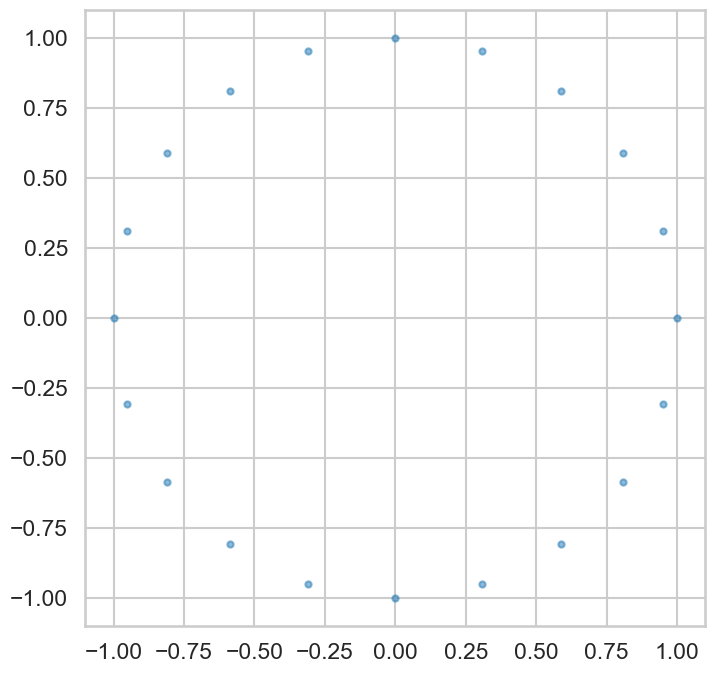

In [8]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X,[],[],0)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

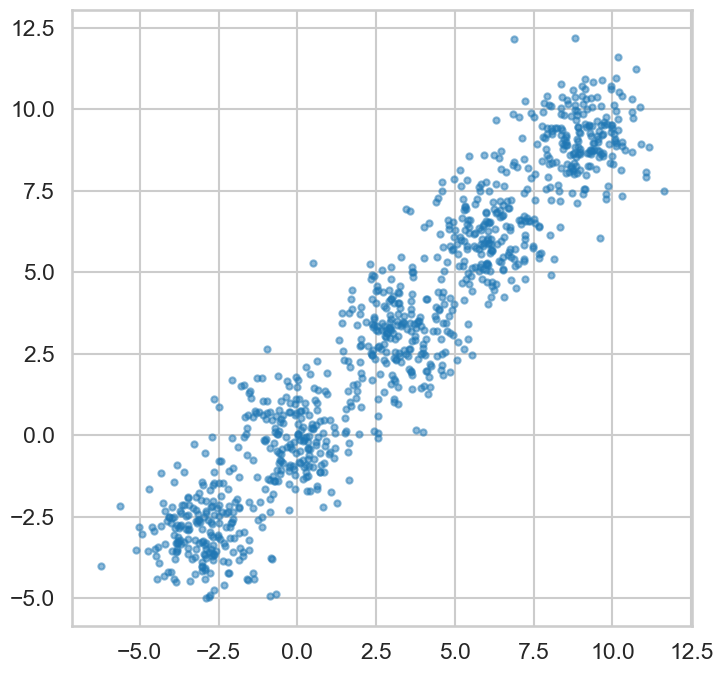

In [9]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X,[],[],0)

#### 2.3. Example 3 : moons Data Gen and display 

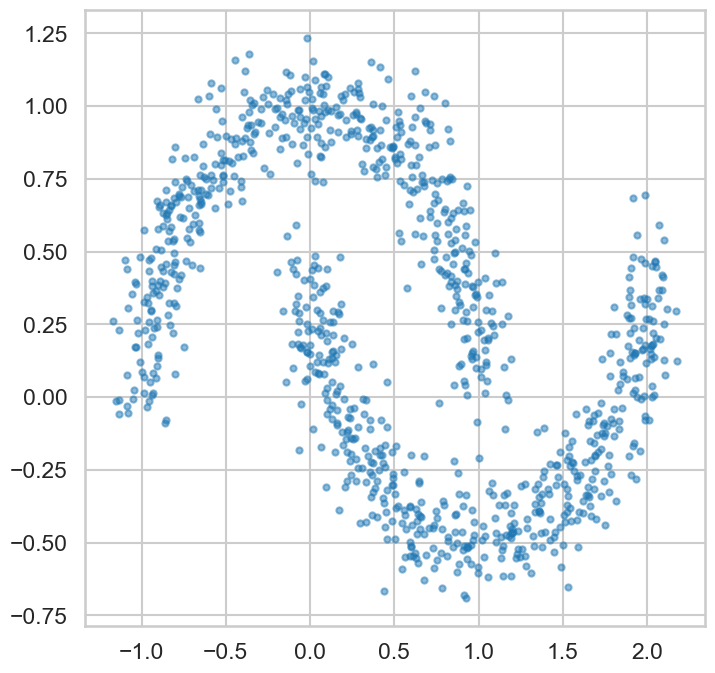

In [10]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X,[],[],0)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

Example 1 Euclidean Distance

Number of Clusters 2


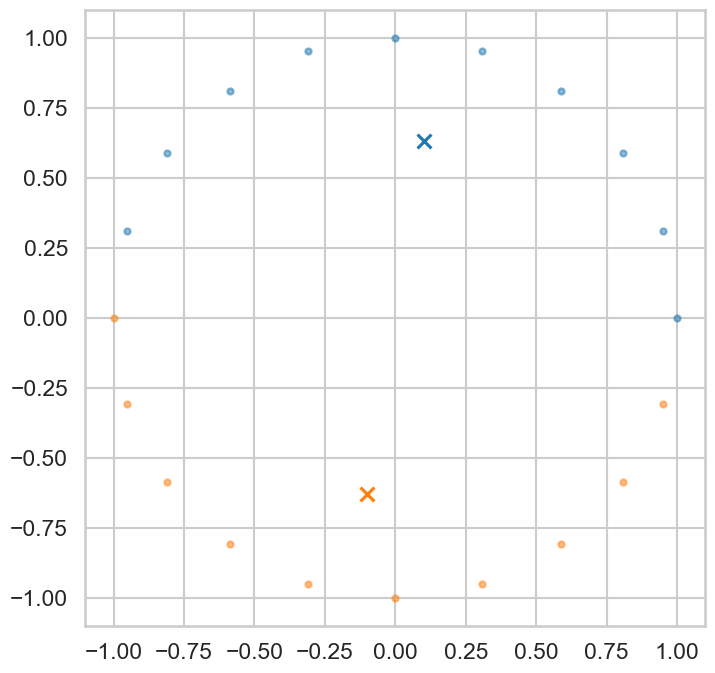

Number of Clusters 3


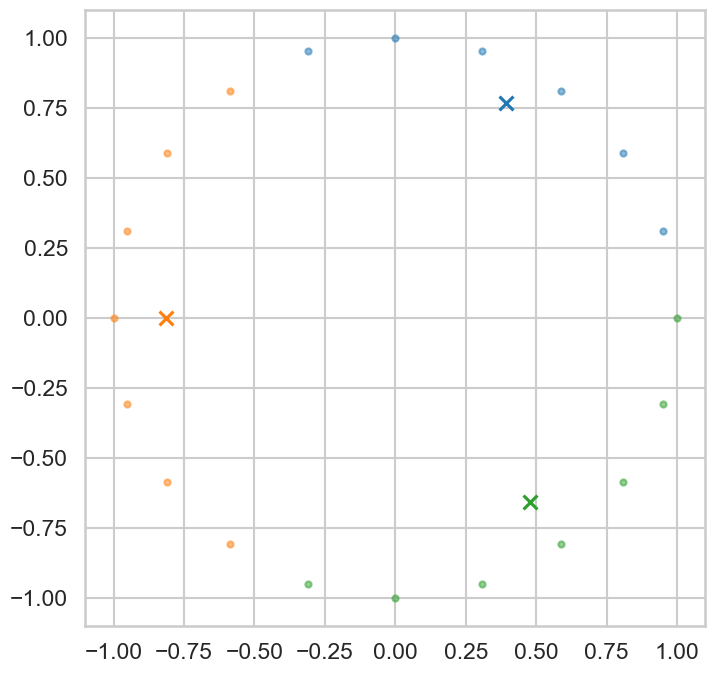

Number of Clusters 4


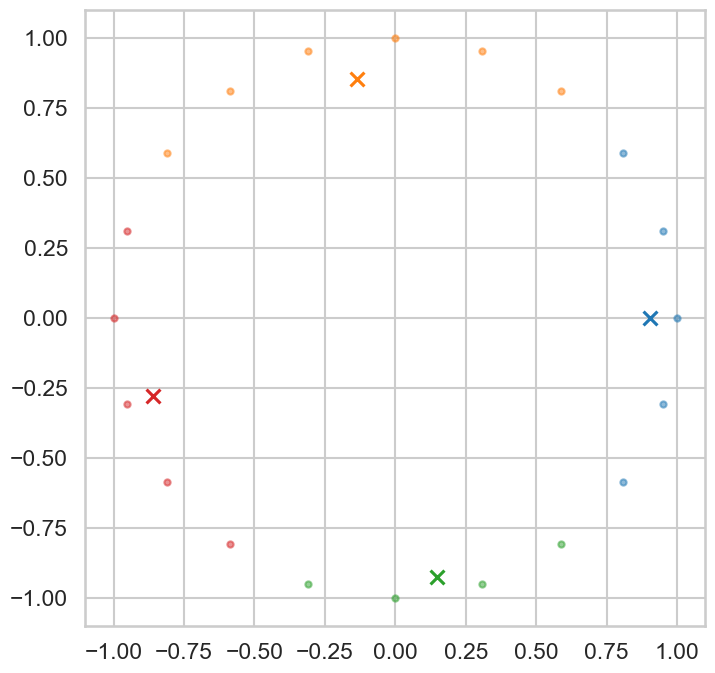

Number of Clusters 5


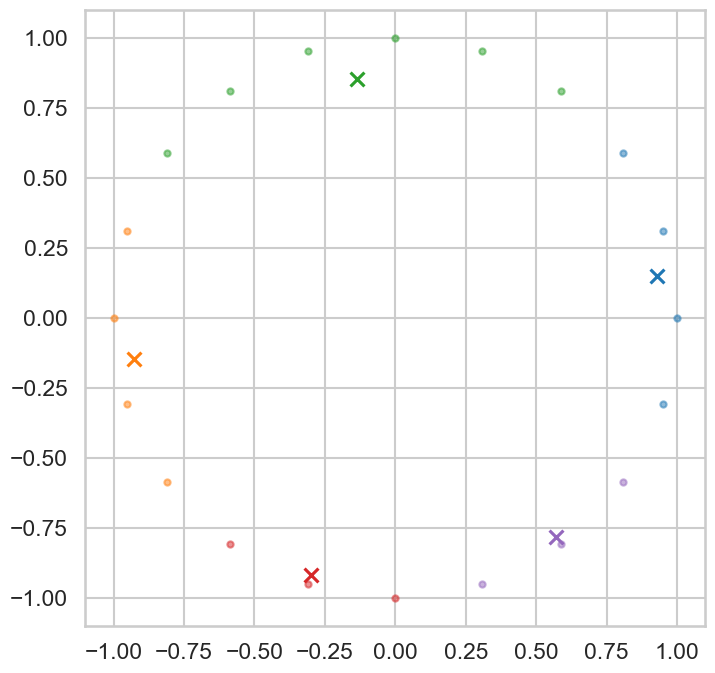

Number of Clusters 6


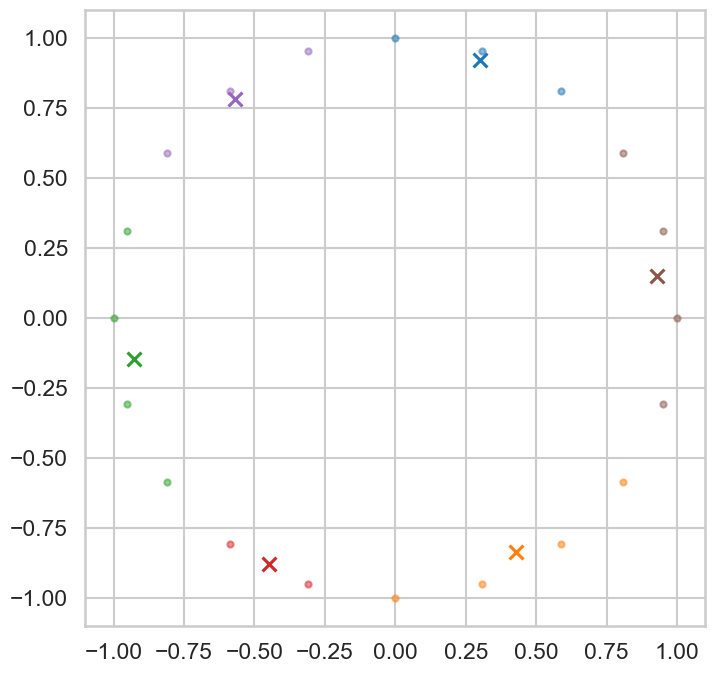

Number of Clusters 7


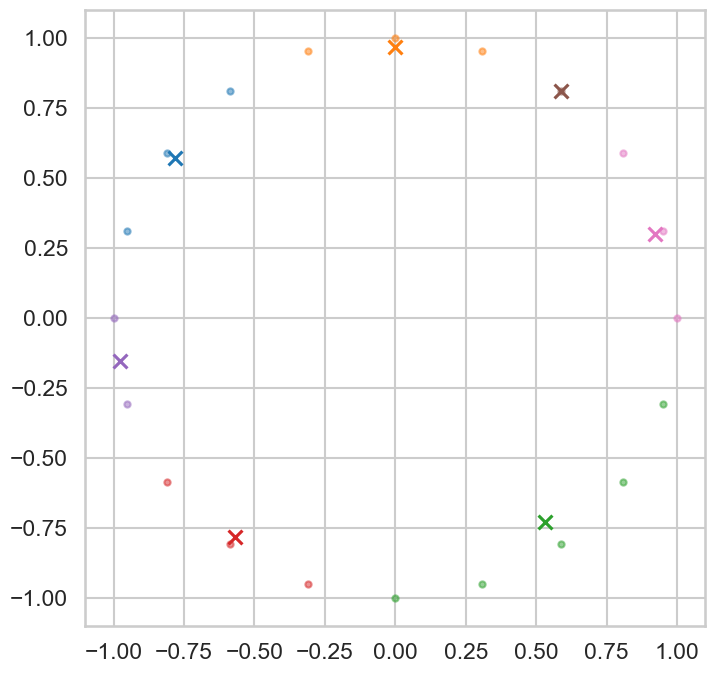

Number of Clusters 8


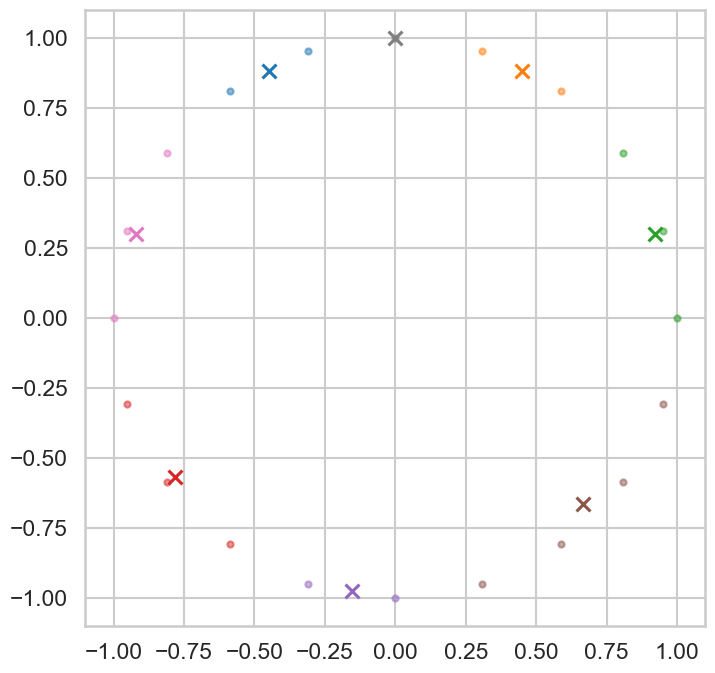

Number of Clusters 9


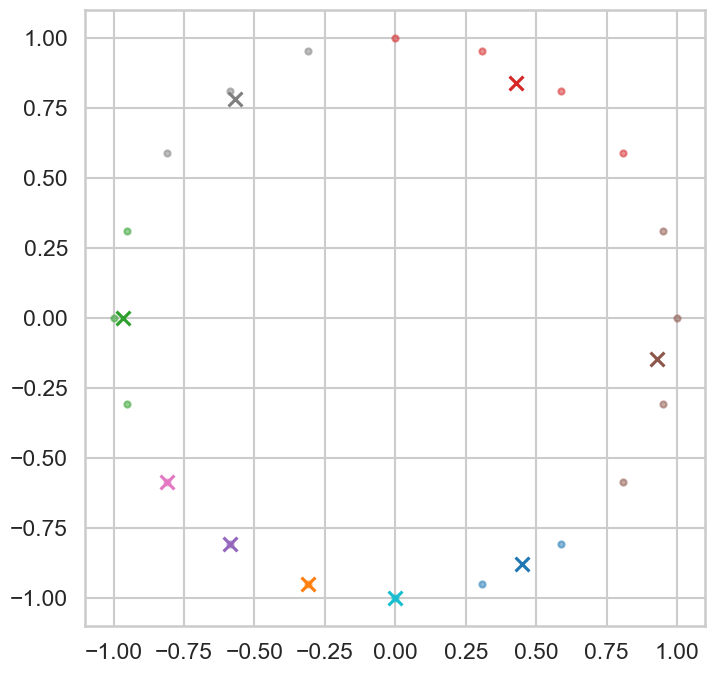

Number of Clusters 10


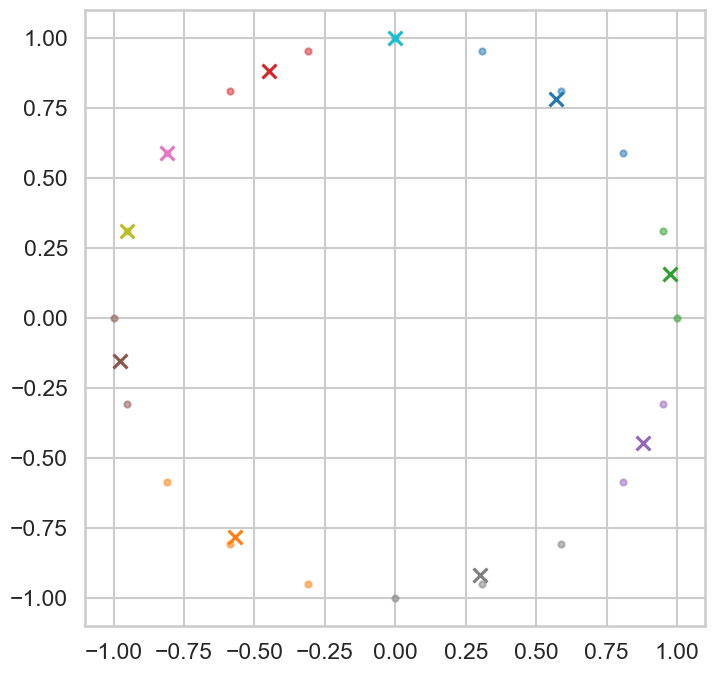

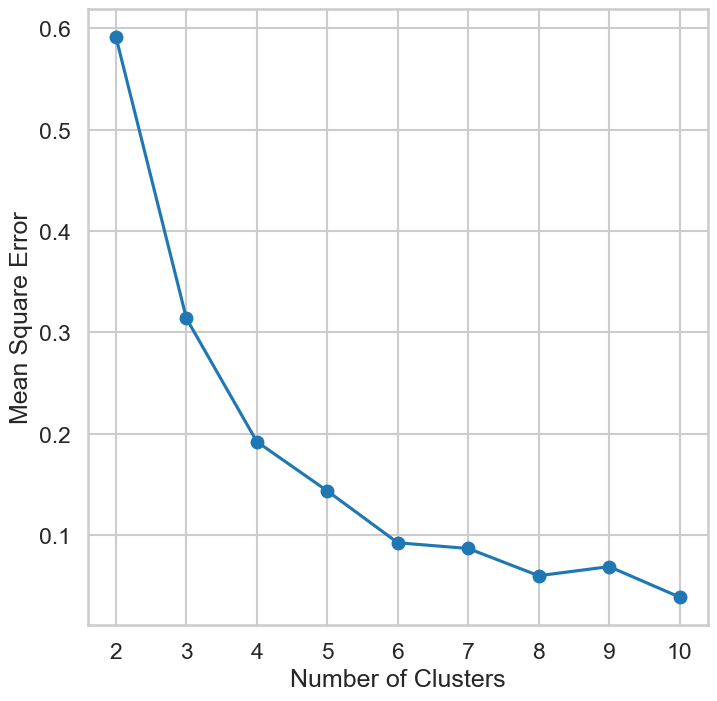

The Elbow Graph


In [11]:
sns.set_style("whitegrid")
sns.set_context("talk")
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
Cluster_Metric = np.zeros(11)
for i in range(2, 11):
    cluster_centroids, cluster_assignments, Cluster_Metric[i] = GUC_Kmean(X,i,"euclidean")
    display_cluster(X,cluster_centroids,cluster_assignments,i)
clusters_range = range(2, 11) 
display_elbow(clusters_range,Cluster_Metric[2:] )
print("The Elbow Graph")

Exmaple 1 Pearson Distance

Number of Clusters 2


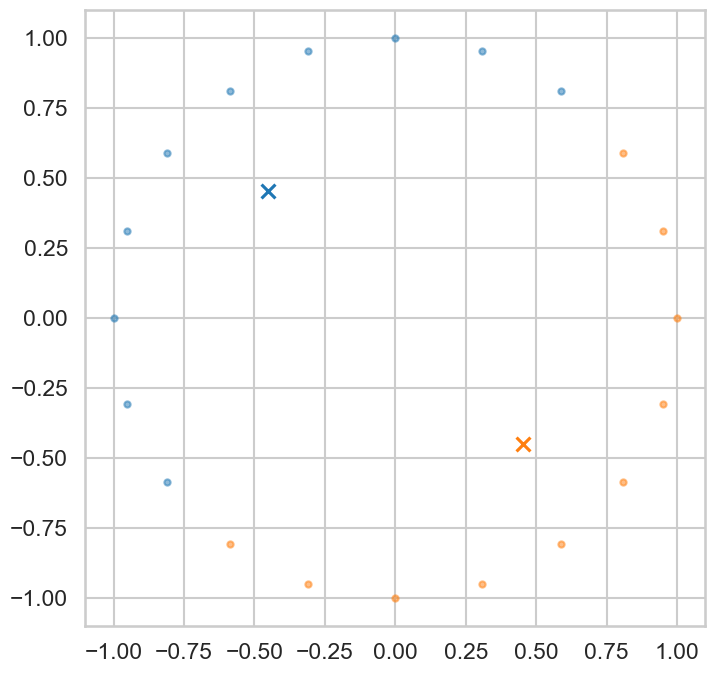

Number of Clusters 3


C:\Users\DELL\AppData\Local\Temp\ipykernel_22872\4293321421.py:22: RuntimeWarning: invalid value encountered in divide
  mean /= counts[:, None]


KeyboardInterrupt: 

In [12]:
sns.set_style("whitegrid")
sns.set_context("talk")
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
Cluster_Metric = np.zeros(11)
for i in range(2, 11):
    cluster_centroids, cluster_assignments, Cluster_Metric[i] = GUC_Kmean(X,i,"pearson")
    display_cluster(X,cluster_centroids,cluster_assignments,i)
clusters_range = range(2, 11) 
display_elbow(clusters_range,Cluster_Metric[2:] )
print("The Elbow Graph")

Example 2 
    Euclidean Distance


Number of cluster : 2


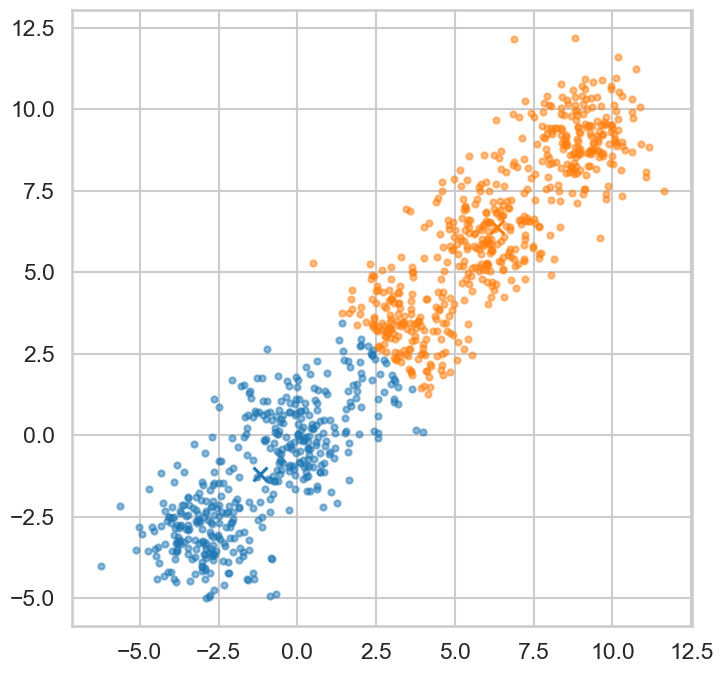

Number of cluster : 3


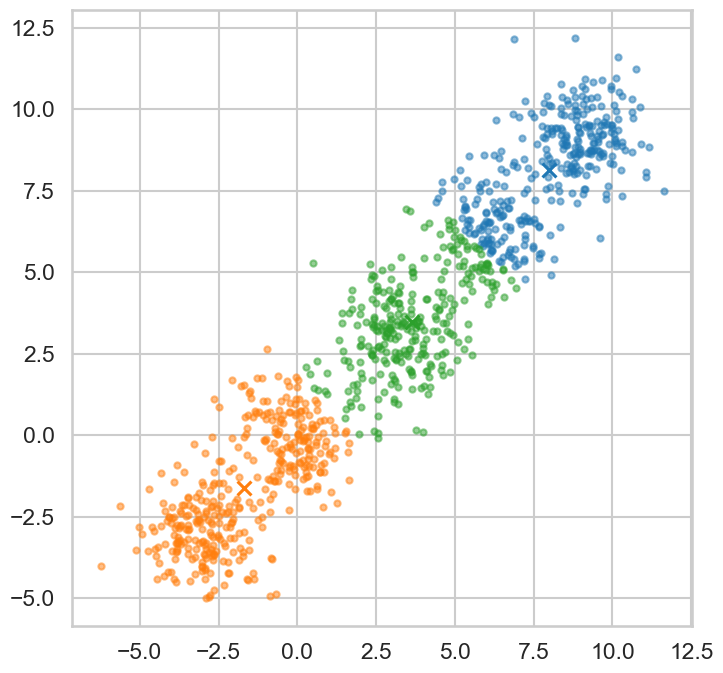

Number of cluster : 4


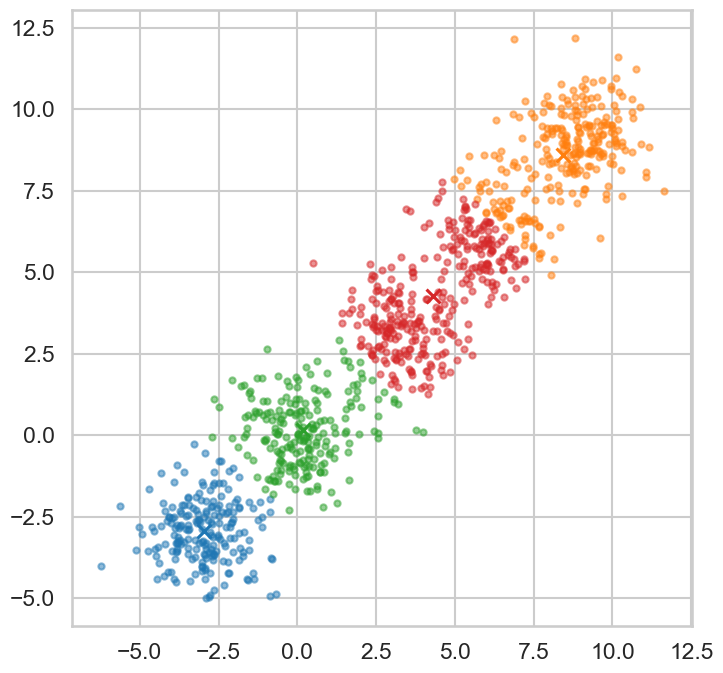

Number of cluster : 5


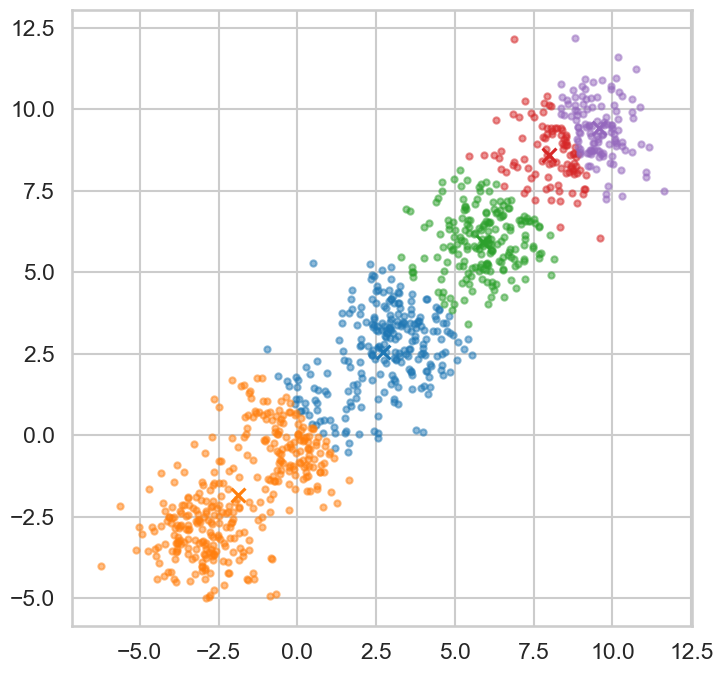

Number of cluster : 6


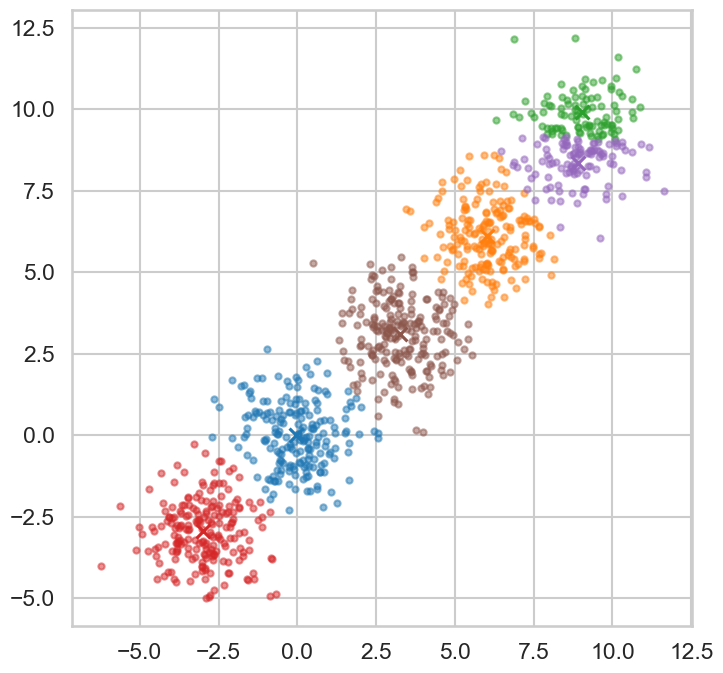

Number of cluster : 7


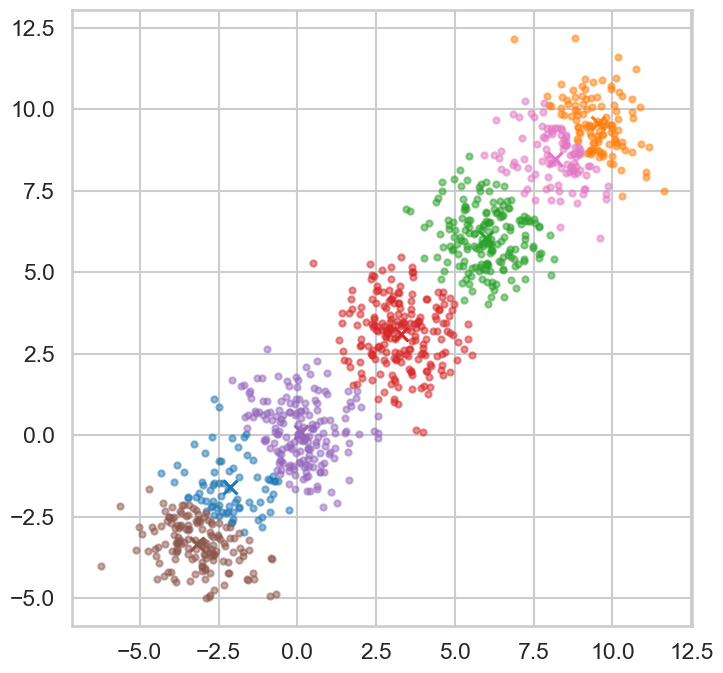

Number of cluster : 8


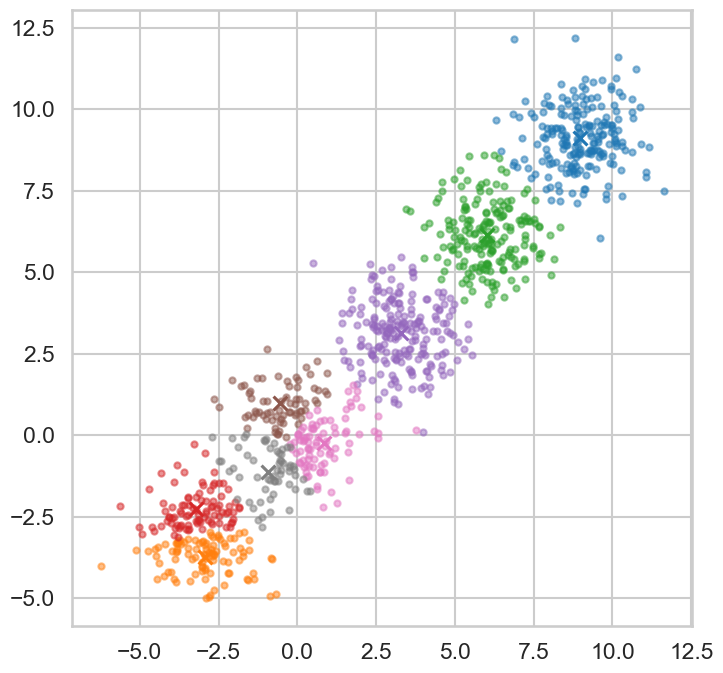

Number of cluster : 9


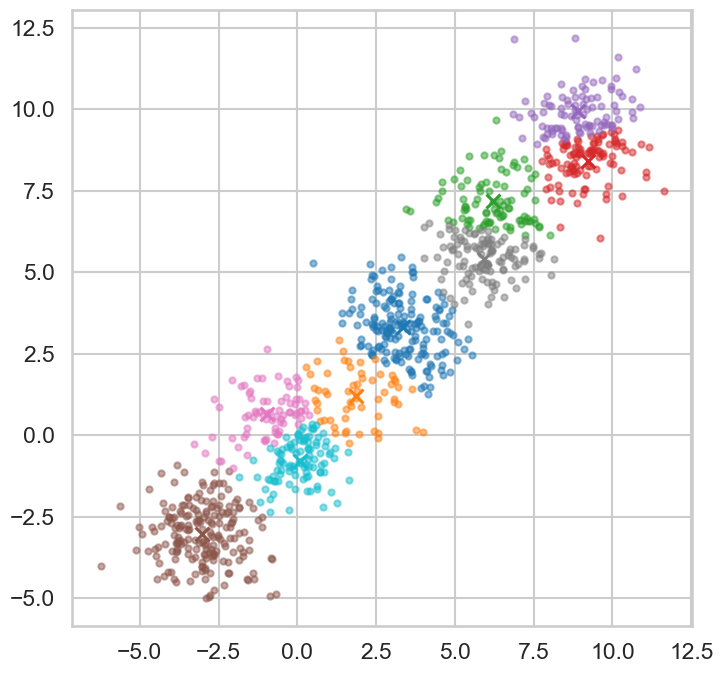

Number of cluster : 10


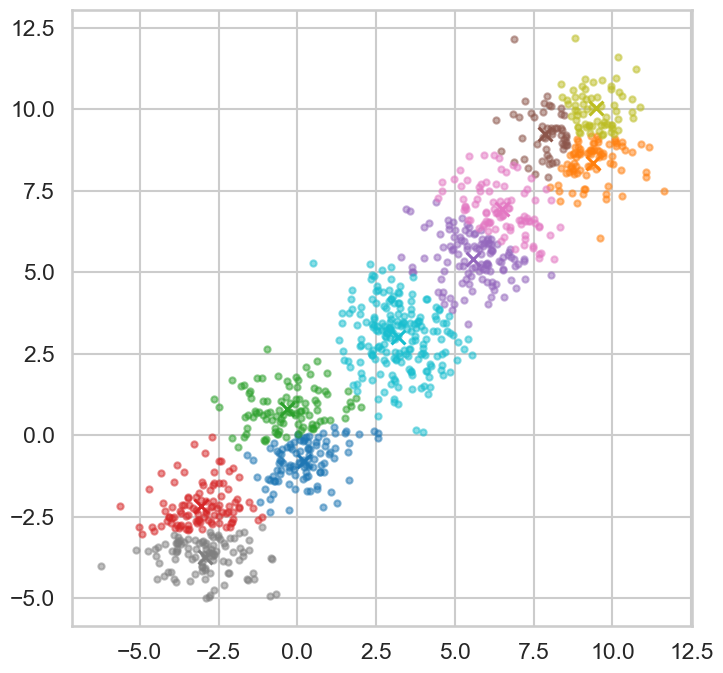

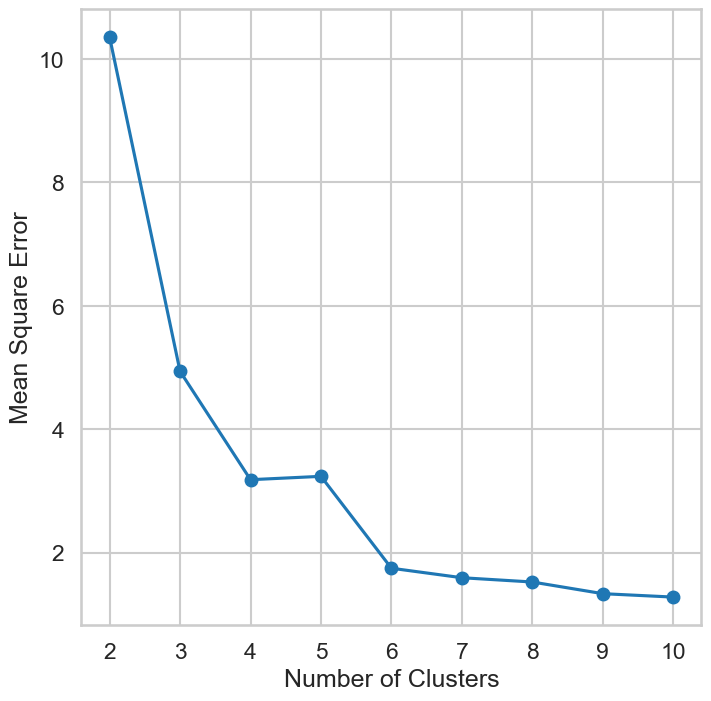

The Elbow Graph


In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
Cluster_Metric = np.zeros(11)
for i in range(2, 11):
    cluster_centroids, cluster_assignments, Cluster_Metric[i] = GUC_Kmean(X,i,"euclidean")
    display_cluster(X,cluster_centroids,cluster_assignments,i)
clusters_range = range(2, 11) 
display_elbow(clusters_range,Cluster_Metric[2:] )
print("The Elbow Graph")

Example 2 Pearson Distance

Number of cluster : 2


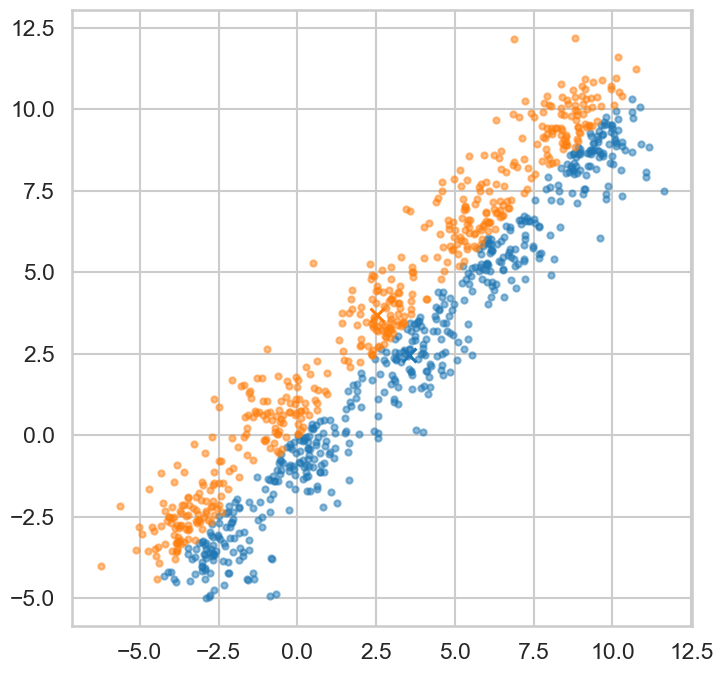

Number of cluster : 3


C:\Users\DELL\AppData\Local\Temp\ipykernel_14592\3704518393.py:25: RuntimeWarning: invalid value encountered in divide
  mean /= counts[:, None]


KeyboardInterrupt: 

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
Cluster_Metric = np.zeros(11)
for i in range(2, 11):
    cluster_centroids, cluster_assignments, Cluster_Metric[i] = GUC_Kmean(X,i,"pearson")
    display_cluster(X,cluster_centroids,cluster_assignments,i)
clusters_range = range(2, 11) 
display_elbow(clusters_range,Cluster_Metric[2:] )
print("The Elbow Graph")

Example 3 Euclidean Distance

Number of cluster : 2


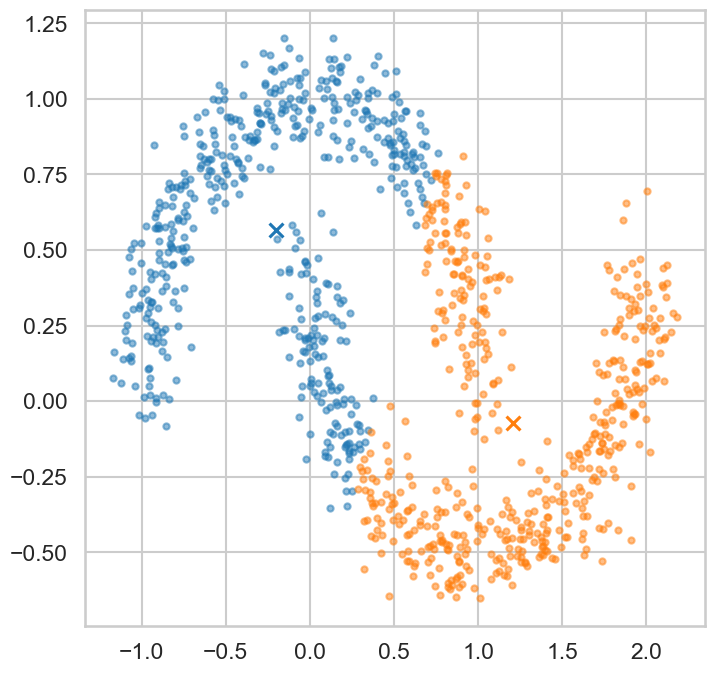

Number of cluster : 3


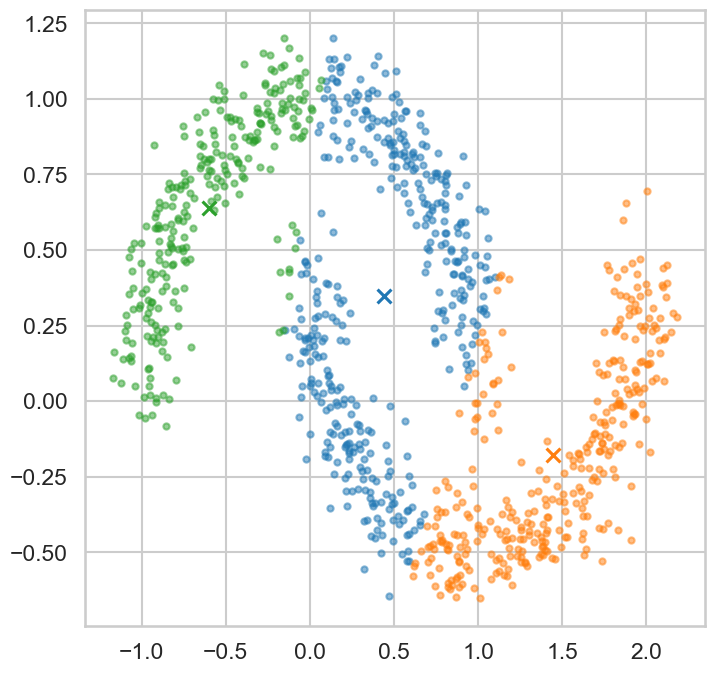

Number of cluster : 4


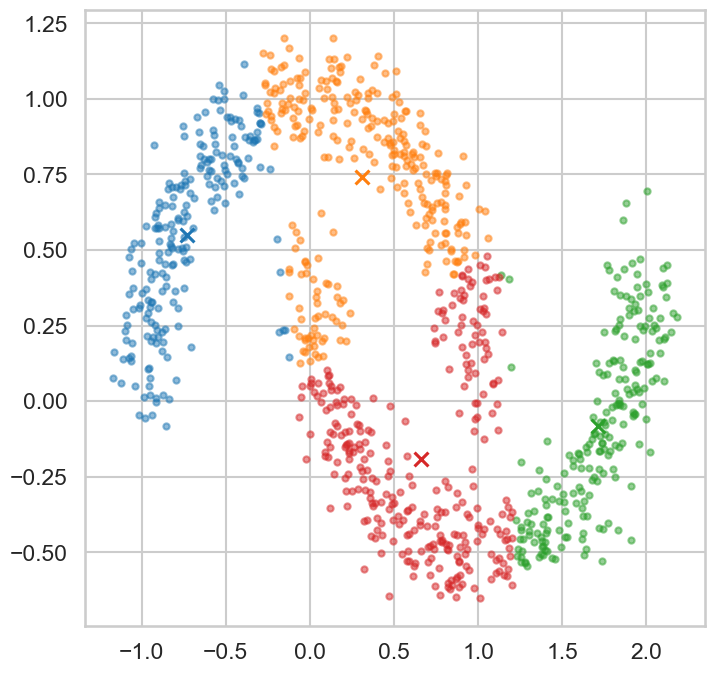

Number of cluster : 5


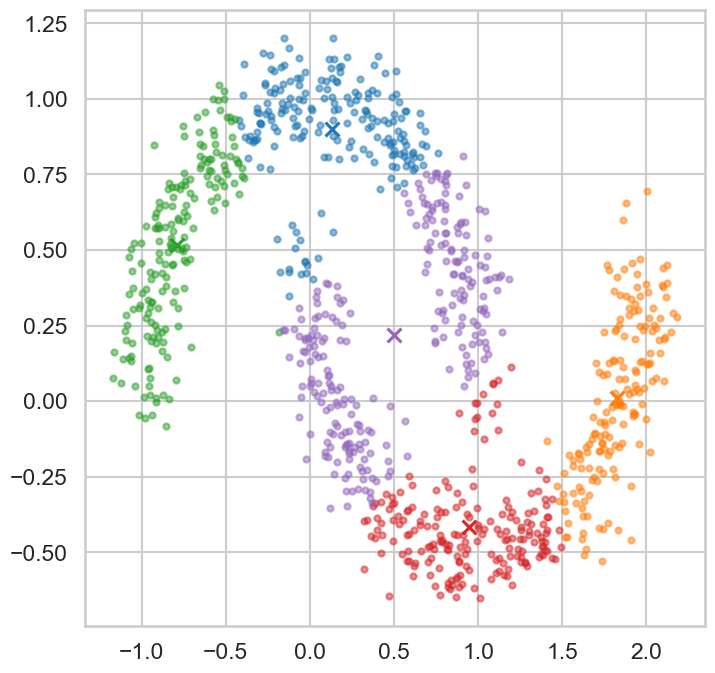

Number of cluster : 6


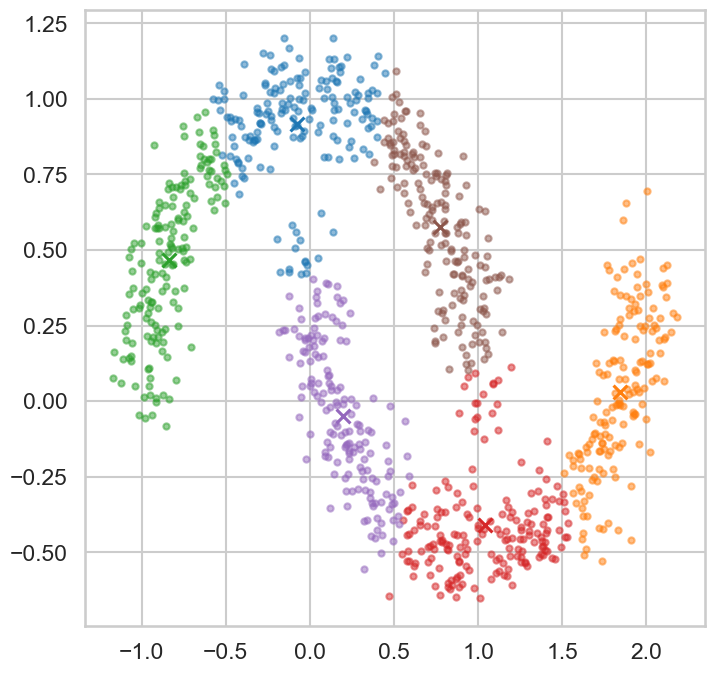

Number of cluster : 7


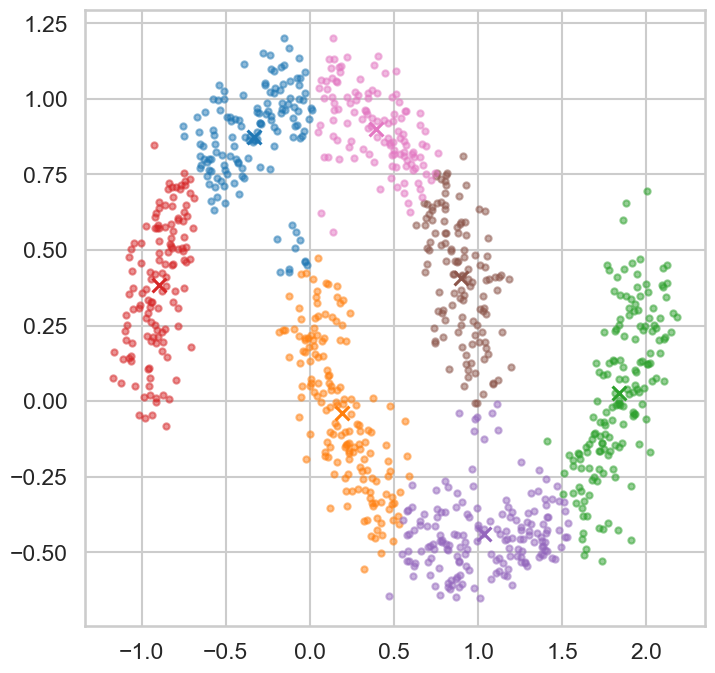

Number of cluster : 8


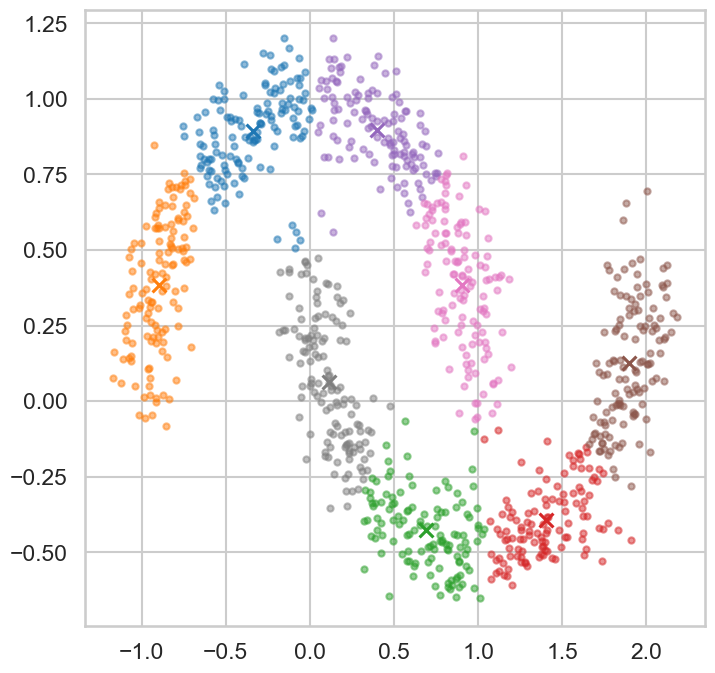

Number of cluster : 9


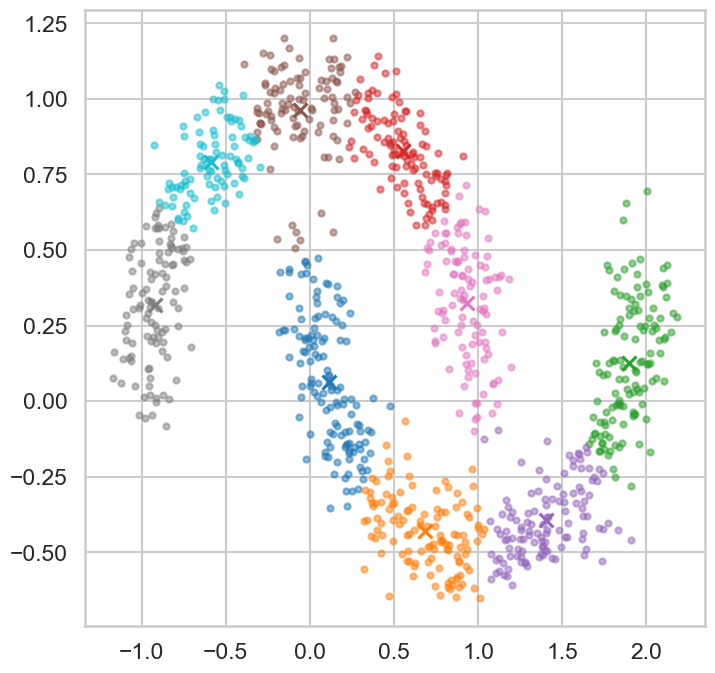

Number of cluster : 10


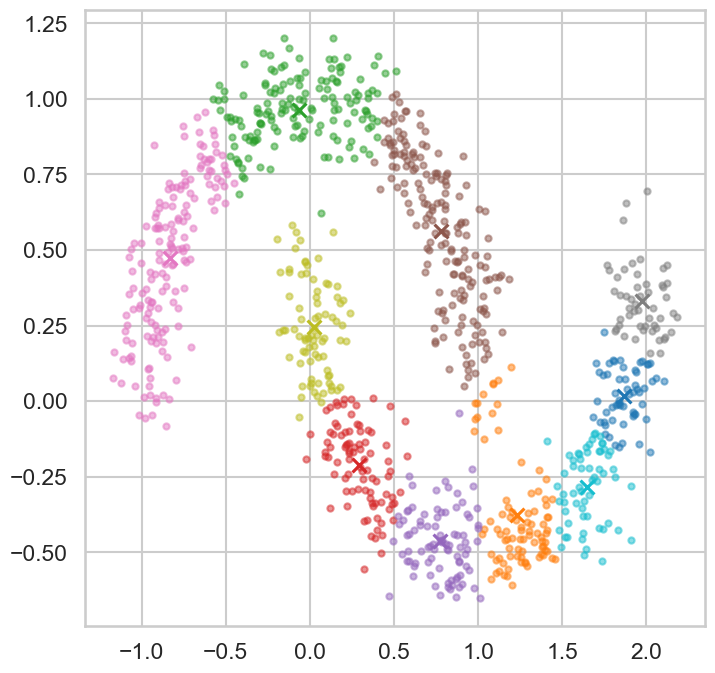

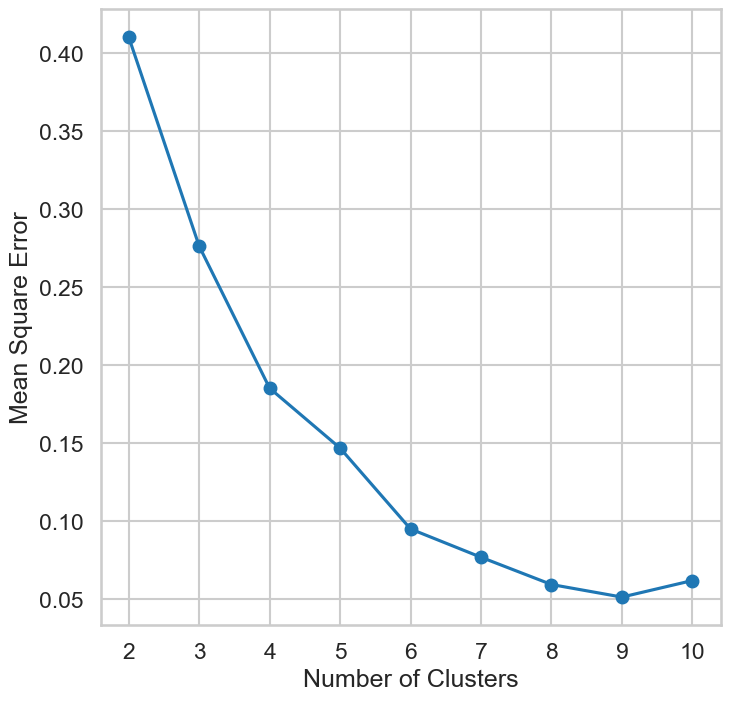

The Elbow Graph


In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
Cluster_Metric = np.zeros(11)
for i in range(2, 11):
    cluster_centroids, cluster_assignments, Cluster_Metric[i] = GUC_Kmean(X,i,"euclidean")
    display_cluster(X,cluster_centroids,cluster_assignments,i)
clusters_range = range(2, 11) 
display_elbow(clusters_range,Cluster_Metric[2:] )
print("The Elbow Graph")

Example 3 Pearson Distance

Number of Clusters 2


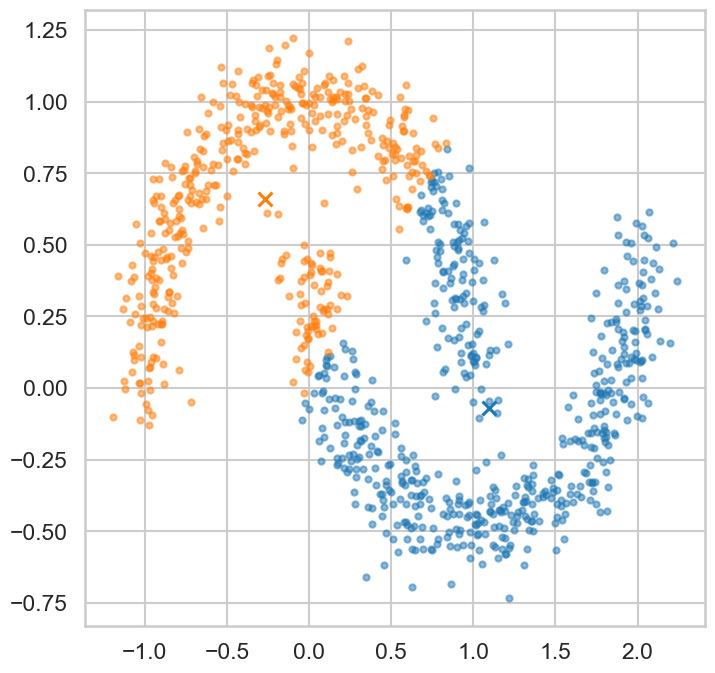

Number of Clusters 3


C:\Users\DELL\AppData\Local\Temp\ipykernel_22872\4293321421.py:22: RuntimeWarning: invalid value encountered in divide
  mean /= counts[:, None]


KeyboardInterrupt: 

In [15]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
Cluster_Metric = np.zeros(11)
for i in range(2, 11):
    cluster_centroids, cluster_assignments, Cluster_Metric[i] = GUC_Kmean(X,i,"pearson")
    display_cluster(X,cluster_centroids,cluster_assignments,i)
clusters_range = range(2, 11) 
display_elbow(clusters_range,Cluster_Metric[2:] )
print("The Elbow Graph")

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

Customer Dataset Euclidean Distance

Number of Clusters 2
num_plots 2


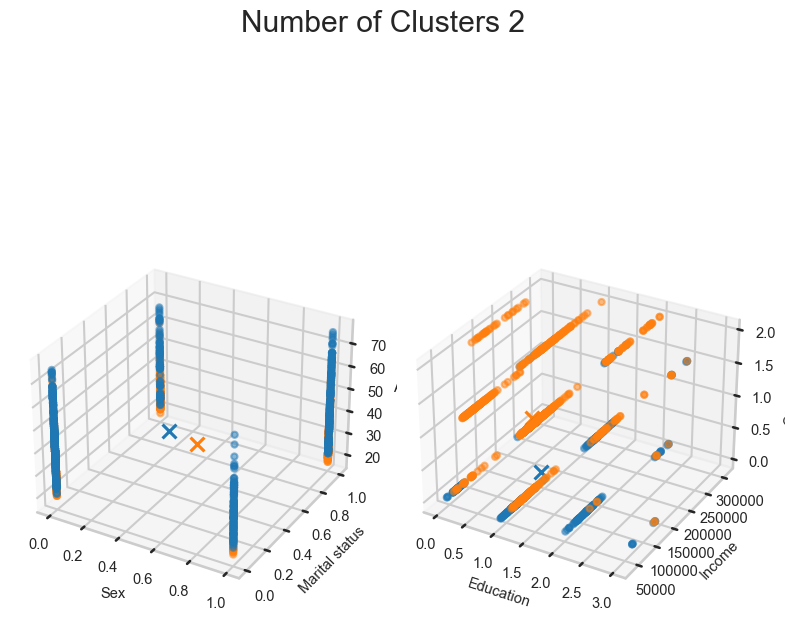

Number of Clusters 3
num_plots 2


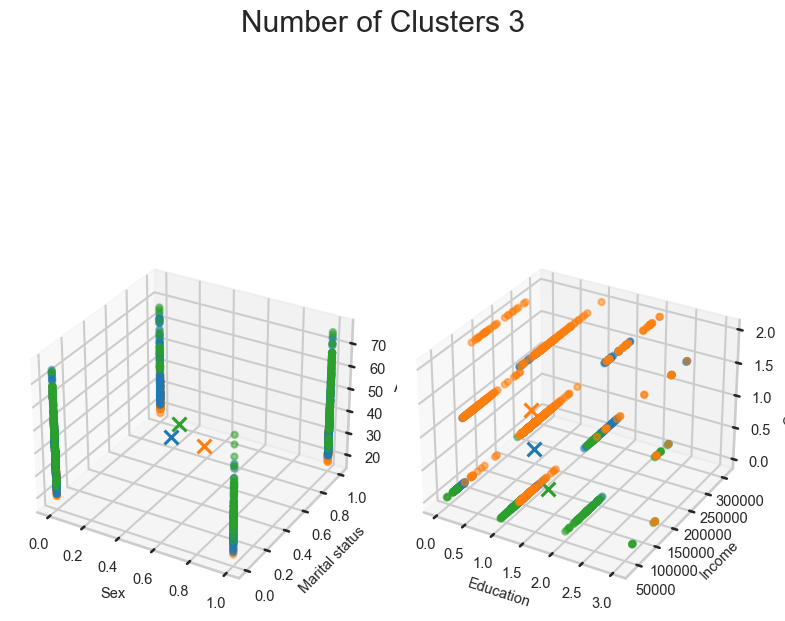

Number of Clusters 4
num_plots 2


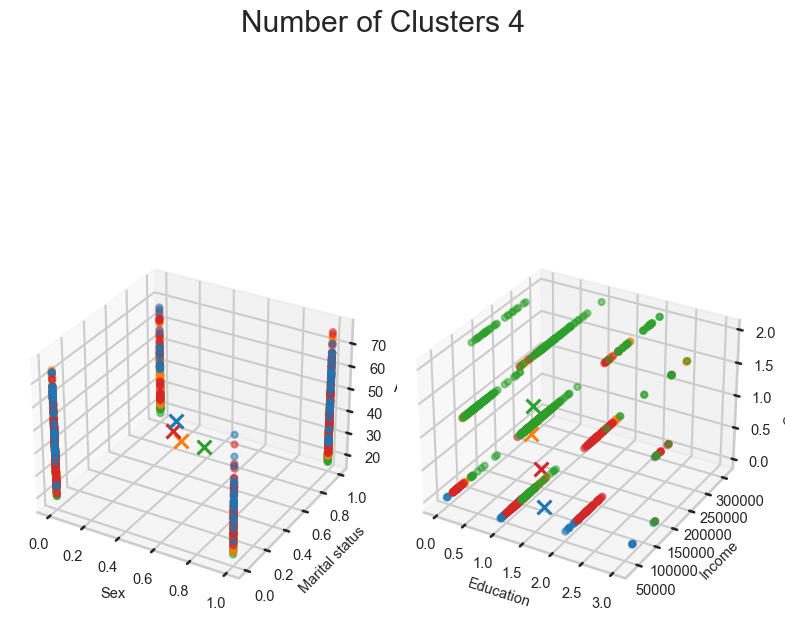

Number of Clusters 5
num_plots 2


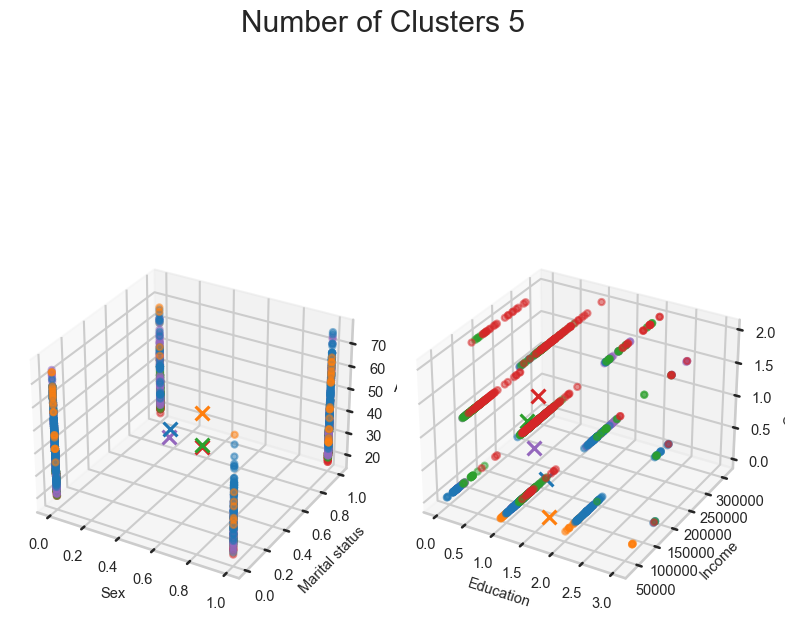

Number of Clusters 6
num_plots 2


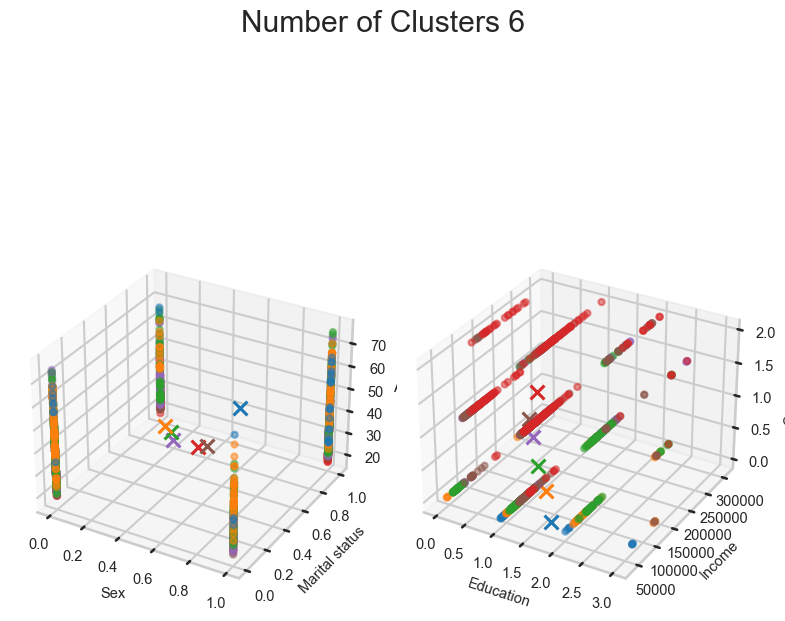

Number of Clusters 7
num_plots 2


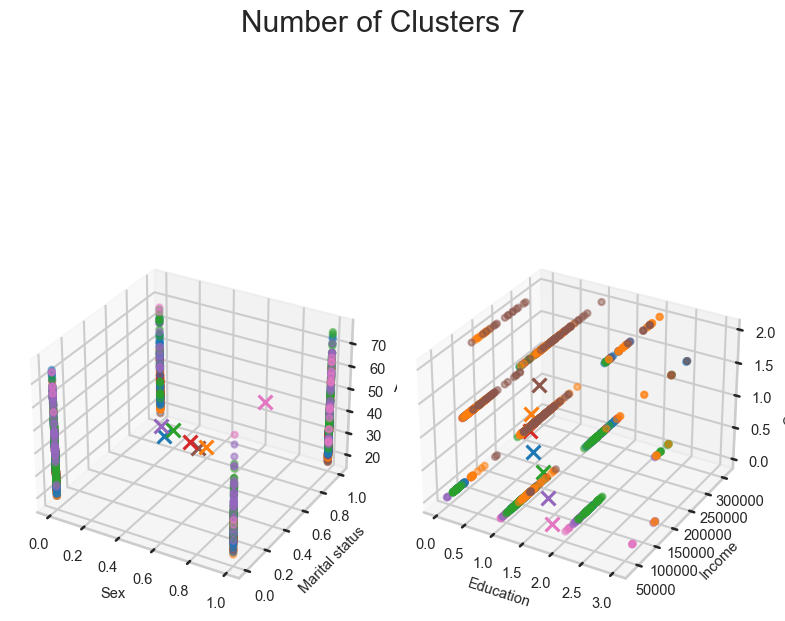

Number of Clusters 8
num_plots 2


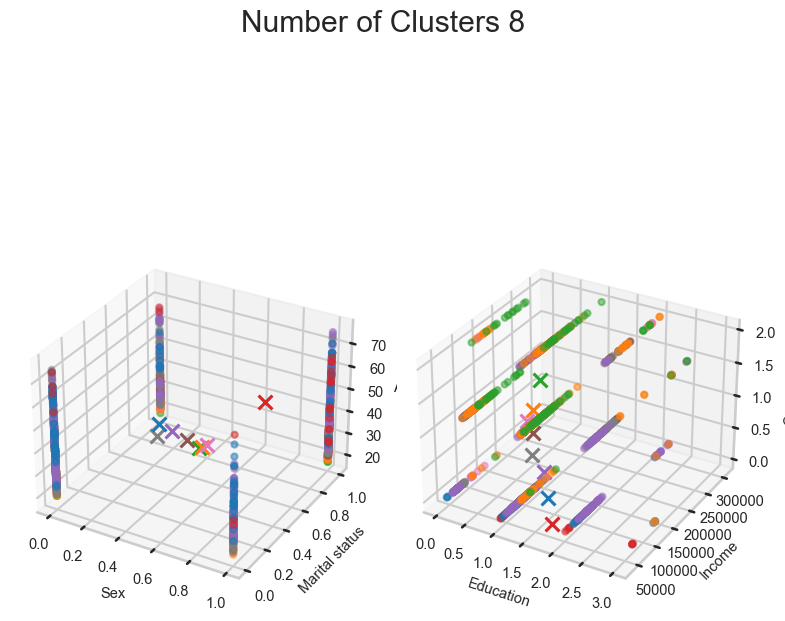

Number of Clusters 9
num_plots 2


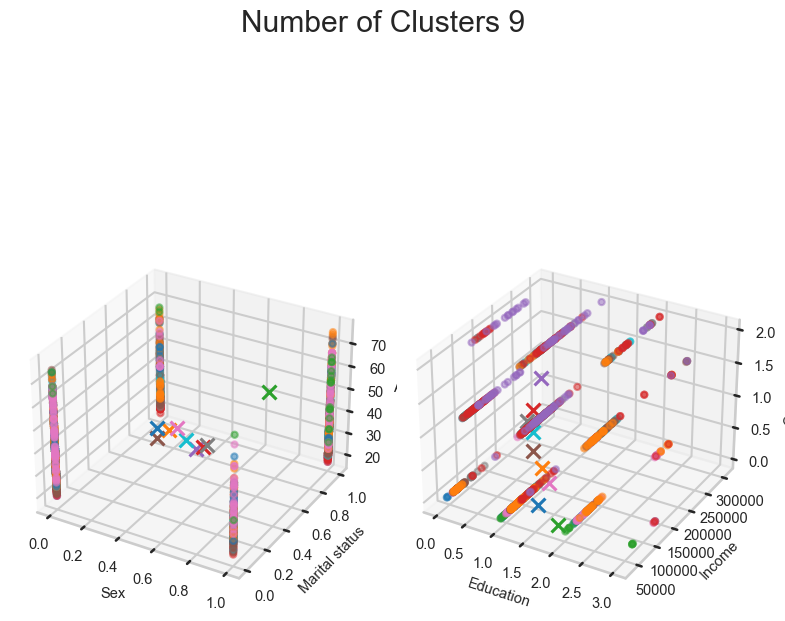

Number of Clusters 10
num_plots 2


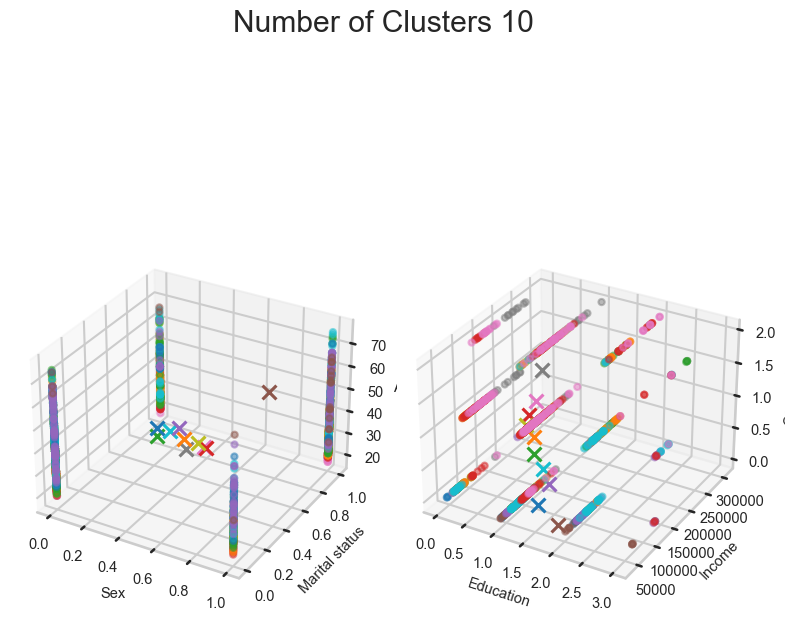

cluster mertic [0.00000000e+00 0.00000000e+00 1.34011758e-16 5.84469007e-17
 2.35225310e-17 5.03998921e-18 1.79287905e-18 1.03231881e-18
 9.59769919e-19 5.30098334e-19 5.16992764e-19]


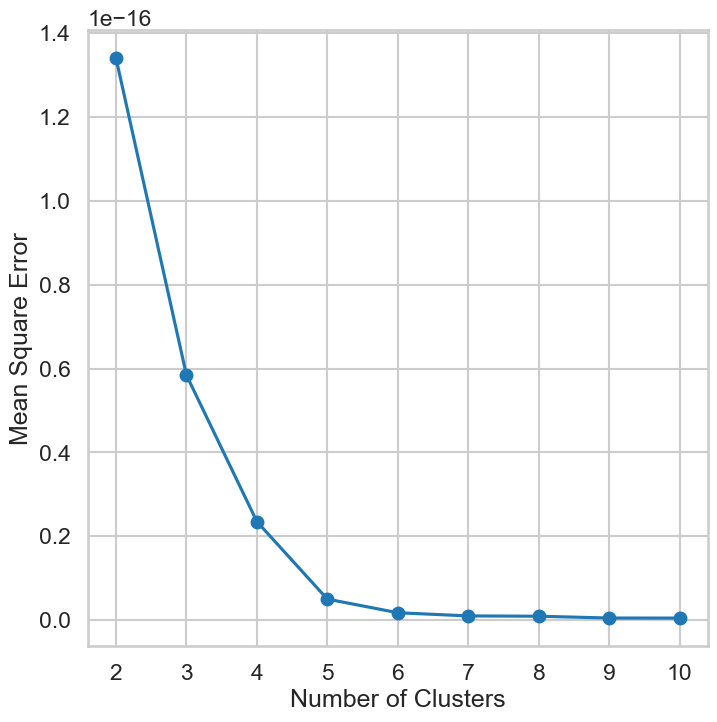

In [ ]:
data = pd.read_csv('Customer data.csv')
data = data.drop(data.columns[0], axis=1)
column_labels = data.columns.tolist()
data = data.values
Cluster_Metric = np.zeros(11)

for i in range(2, 11):
    cluster_centroids, cluster_assignments, Cluster_Metric[i] = GUC_Kmean(data,i,"pearson")
    display_cluster_2(data,cluster_centroids,cluster_assignments,column_labels,i)
print("cluster mertic",Cluster_Metric )
clusters_range = range(2, 11) 
display_elbow(clusters_range,Cluster_Metric[2:] )

Customer Dataset pearson Distance

Number of Clusters 2
num_plots 2


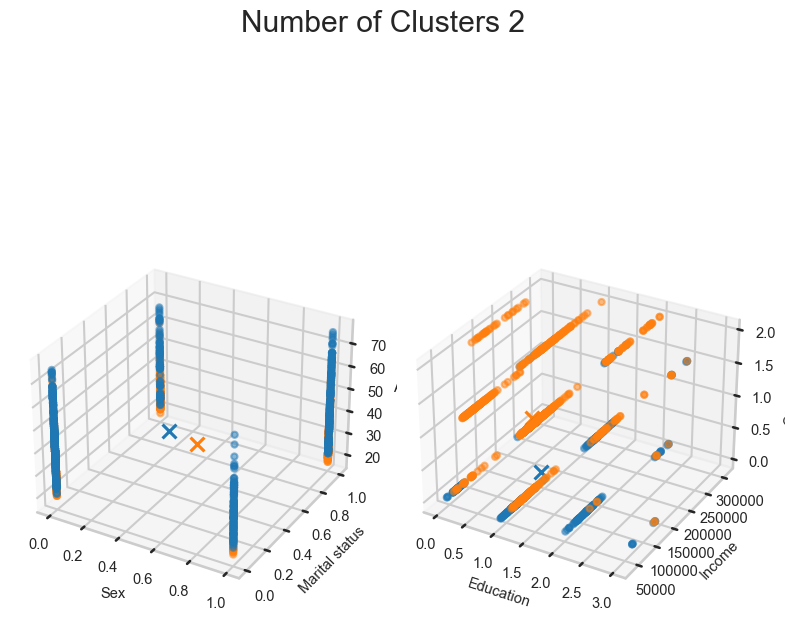

Number of Clusters 3
num_plots 2


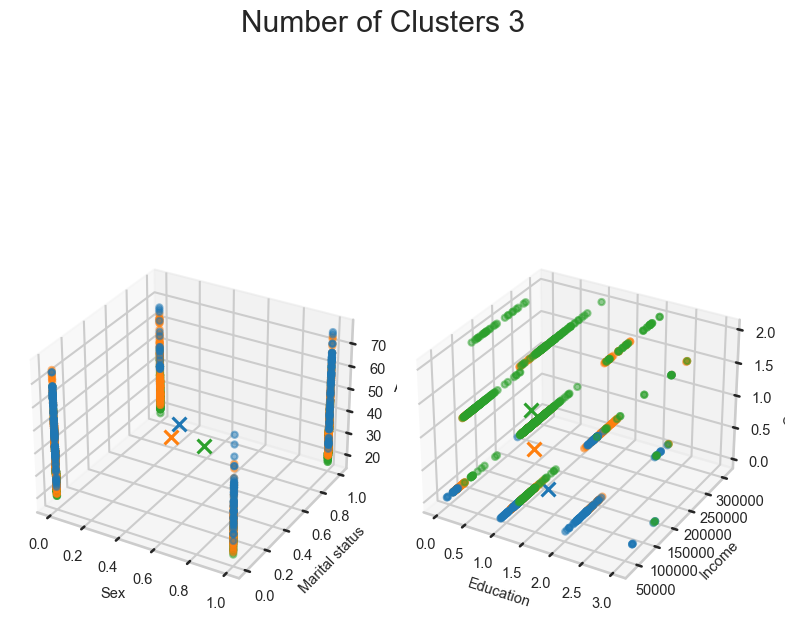

Number of Clusters 4
num_plots 2


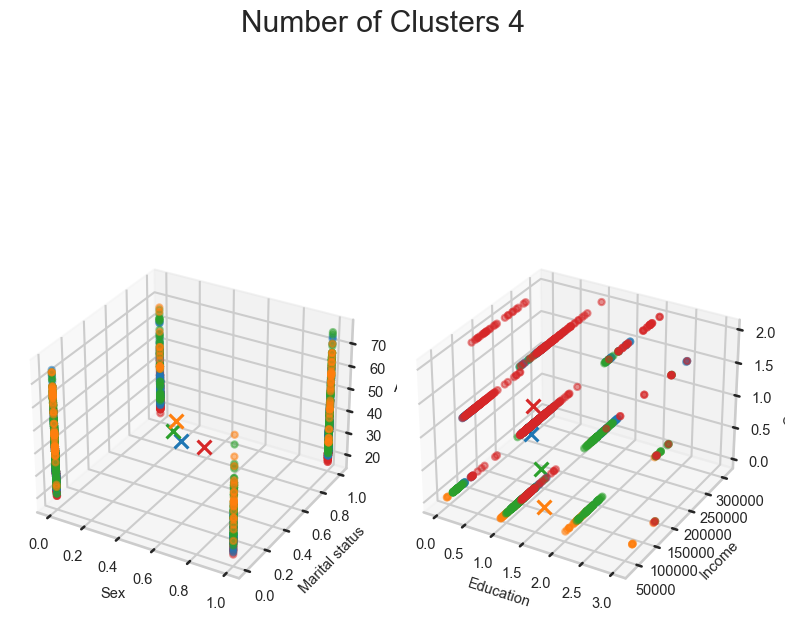

Number of Clusters 5
num_plots 2


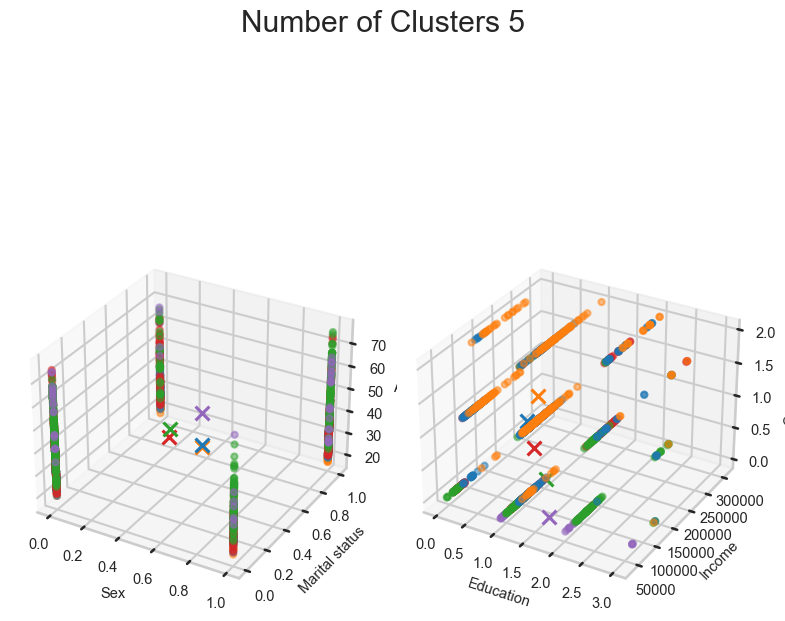

Number of Clusters 6
num_plots 2


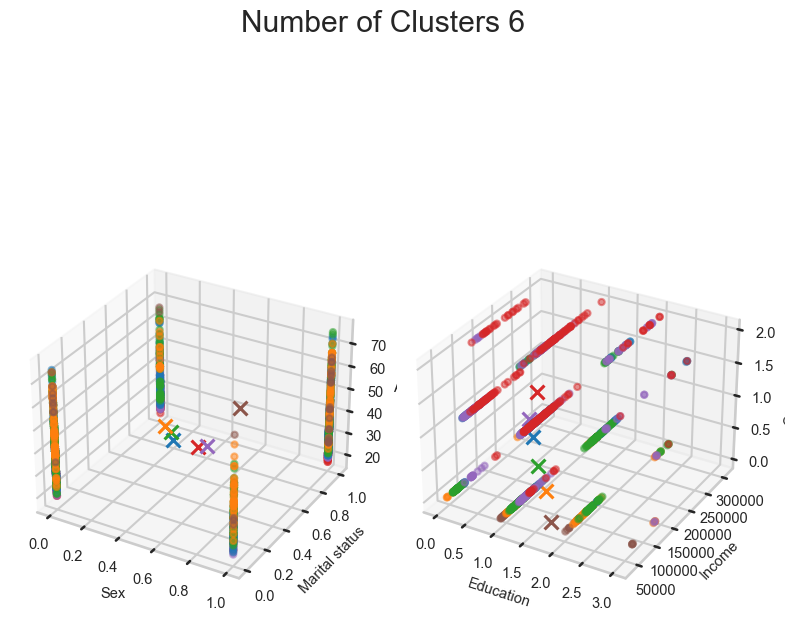

Number of Clusters 7
num_plots 2


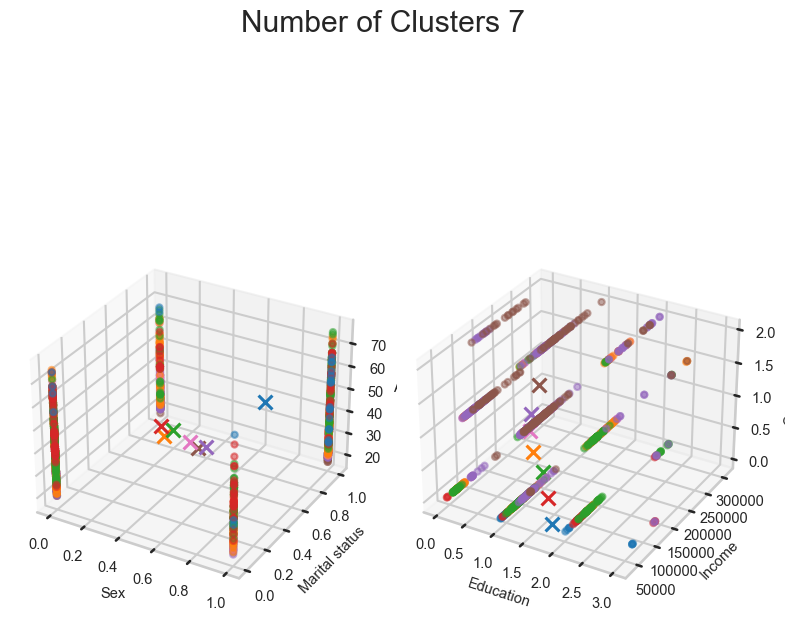

Number of Clusters 8
num_plots 2


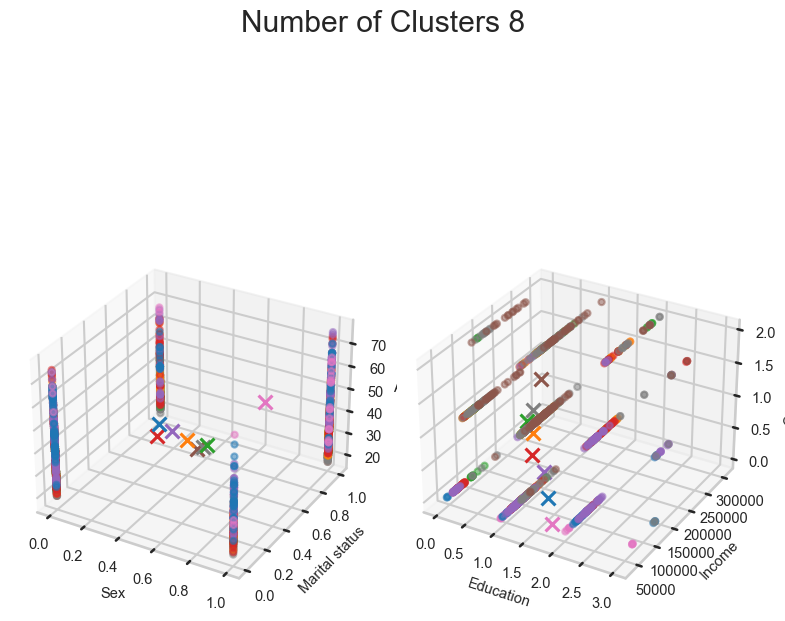

Number of Clusters 9
num_plots 2


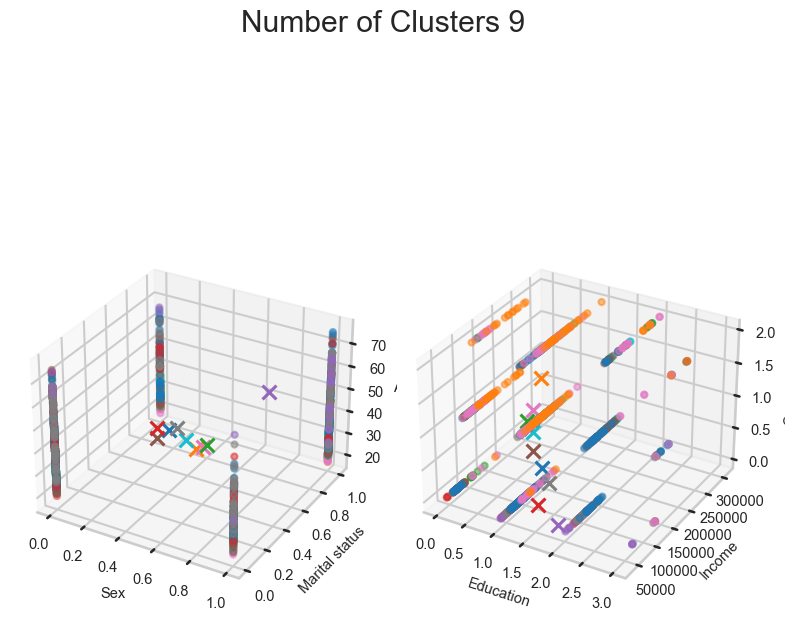

Number of Clusters 10
num_plots 2


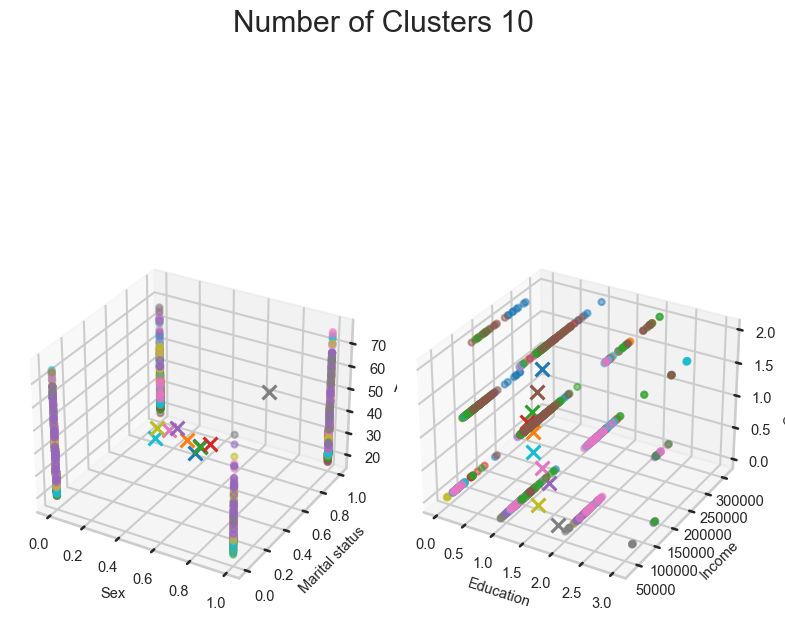

cluster mertic [0.00000000e+00 0.00000000e+00 1.34011758e-16 5.84469007e-17
 2.35225310e-17 5.03998921e-18 1.79287905e-18 1.03231881e-18
 9.59489107e-19 5.30098334e-19 5.21147838e-19]


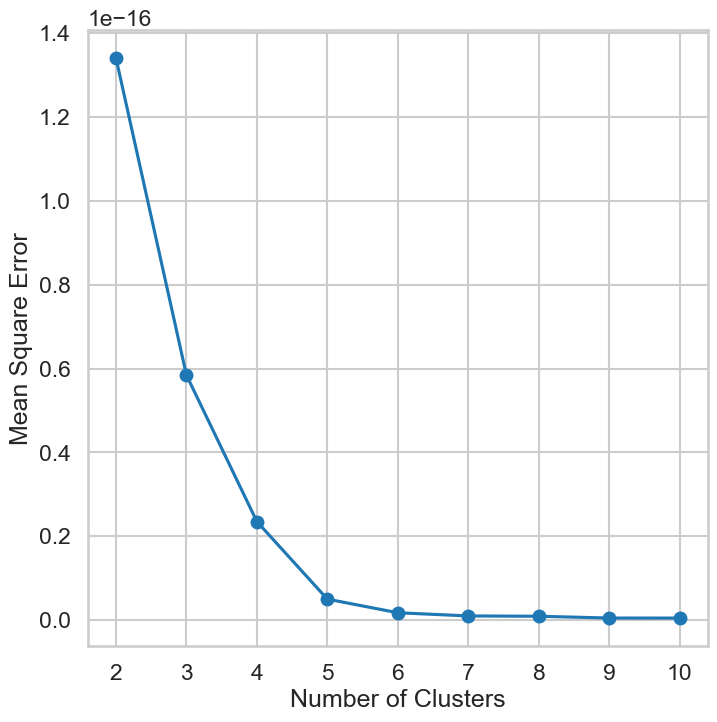

In [ ]:
data = pd.read_csv('Customer data.csv')
data = data.drop(data.columns[0], axis=1)
column_labels = data.columns.tolist()
data = data.values
Cluster_Metric = np.zeros(11)

for i in range(2, 11):
    cluster_centroids, cluster_assignments, Cluster_Metric[i] = GUC_Kmean(data,i,"pearson")
    display_cluster_2(data,cluster_centroids,cluster_assignments,column_labels,i)
print("cluster mertic",Cluster_Metric )
clusters_range = range(2, 11) 
display_elbow(clusters_range,Cluster_Metric[2:] )
